# Análisis de clustering para las propiedades de distintas marcas de cerveza en Colombia

**Grupo 10 - Santiago Pulido, Liliana Briceño, Cristhian Barbosa, Diego Peñaloza**

### Resumen

Se propone realizar un perfilamiento del mercado de cerveza nacional a partir de las características de las marcas que lo componen, estableciendo perfiles cerveceros que agrupen diferentes marcas para identificar posibles oportunidades de negocio.

Para ello, se cuenta con las características químicas, sensoriales y de producción global de 52 marcas de cerveza masivas y artesanales del mercado nacional para los años entre 2020 y 2023. Cada conjunto de características se compone de distintas variables que aportan información valiosa sobre las características de cada marca.

Con la información disponible se busca que, empleando técnicas de aprendizaje no supervisado, como el análisis de clústeres, permita segmentar el mercado de cervezas en Colombia a partir de resultados sensoriales, fisicoquímicos y cantidad de ventas. Esto podría ayudar a identificar oportunidades de crecimiento en sectores no explorados, preferencias del consumidor, desarrollo de marcas nuevas o potenciar las ya existentes.

A continuación, se desarrolla en detalle el trabajo realizado con los datos disponibles, los resultados obtenidos y las principales conclusiones conforme a la necesidad del negocio.

## 1. Cargue y análisis preliminar de los datos

Para el estudio propuesto contamos con una base de datos con 52 marcas de cerveza y 15 variables.
Algunos de los campos ofrecen información de las propiedades específicas de cada marca de cerveza
respecto a sus condiciones fisicoquímicas, los parámetros sensoriales que ayudan a describir el perfil de
cada bebida y el volumen de cerveza vendida a nivel nacional para cada marca.

In [4]:
# Importar librerías
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import fcluster
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, explained_variance_score, davies_bouldin_score

import warnings
warnings.filterwarnings('ignore')

In [5]:
# Importar datos
data = pd.read_csv(r'Base de Datos/Datos Entrega Final.csv', delimiter=';', decimal=',')

# Clasificación de variables
marca = data.Marca
 #'Marca',
#Variables ordinales
data['Turbeidad'] = data['Turbeidad'].astype(int)
data['Cuerpo'] = data['Cuerpo'].astype(int)
data['Dulzor'] = data['Dulzor'].astype(int)
data['Astringencia'] = data['Astringencia'].astype(int)
#Variables F.quimicas
chem = list(data.columns)[2:8]
#Variables sensoriales
sens = list(data.columns)[8:12]
#Variables de ventas
ven = list(data.columns)[12:16]

#Descripción de variables
print(data.info())
data.describe().T.round(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Marca              45 non-null     object 
 1   Seg_Categoria      45 non-null     object 
 2   Extracto Original  45 non-null     float64
 3   Extracto Aparente  45 non-null     float64
 4   Alcohol v/v        45 non-null     float64
 5   pH                 45 non-null     float64
 6   Color              45 non-null     float64
 7   Amargo             45 non-null     float64
 8   Turbeidad          45 non-null     int64  
 9   Cuerpo             45 non-null     int64  
 10  Dulzor             45 non-null     int64  
 11  Astringencia       45 non-null     int64  
 12  Ventas 2020        34 non-null     float64
 13  Ventas 2021        44 non-null     float64
 14  Ventas 2022        44 non-null     float64
 15  Ventas 2023        45 non-null     int64  
dtypes: float64(9), int64(5), obj

,count,mean,std,min,25%,50%,75%,max
Extracto Original,45.0,10.32,1.90,4.43,9.72,10.56,11.38,15.75
Extracto Aparente,45.0,2.31,1.22,-0.48,1.96,2.20,2.70,6.64
Alcohol v/v,45.0,4.22,0.97,0.00,3.93,4.34,4.77,6.21
pH,45.0,4.34,0.23,3.50,4.30,4.39,4.47,4.61
Color,45.0,16.94,27.21,5.20,6.07,7.07,12.00,144.00
Amargo,45.0,16.48,7.94,1.50,12.00,16.20,18.60,44.40
Turbeidad,45.0,1.44,0.69,1.00,1.00,1.00,2.00,3.00
Cuerpo,45.0,2.33,0.74,1.00,2.00,2.00,3.00,4.00
Dulzor,45.0,2.29,0.63,1.00,2.00,2.00,3.00,4.00
Astringencia,45.0,2.82,0.98,1.00,2.00,3.00,3.00,5.00


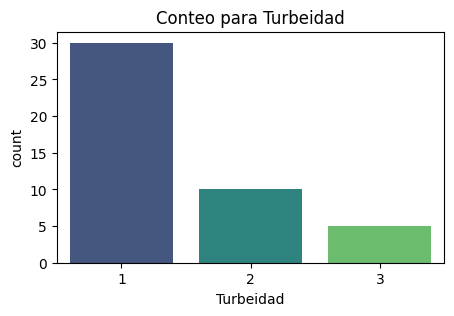

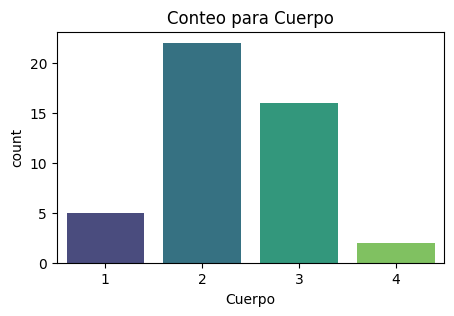

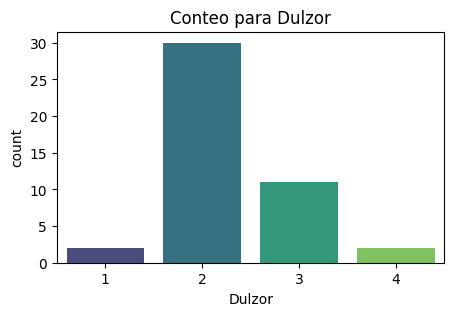

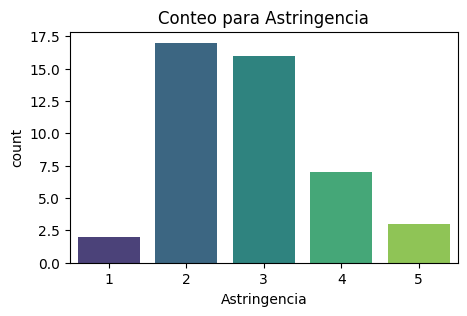

In [6]:
for categoria in sens:
    plt.figure(figsize=(5, 3))
    sns.countplot(x =categoria, data=data, palette='viridis') # Personalizar el gráfico plt.xlabel('Categoría') plt.ylabel('Conteo') plt.title('Conteo por Categoría') plt.show()
    plt.title(f'Conteo para {categoria}')
    plt.show()

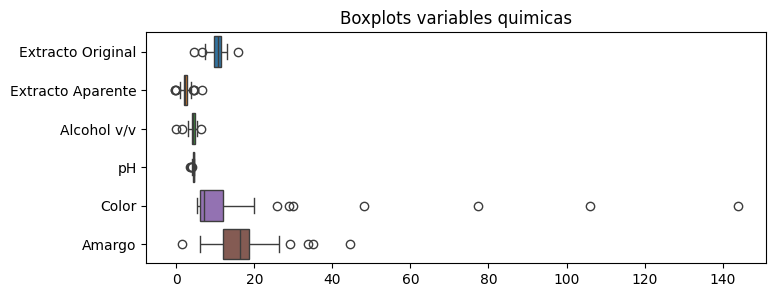

In [7]:
#Boxplots variables fisico - quimicas
plt.figure(figsize=[8,3])
sns.boxplot(data[chem], orient='h')
plt.title("Boxplots variables quimicas")
plt.show()

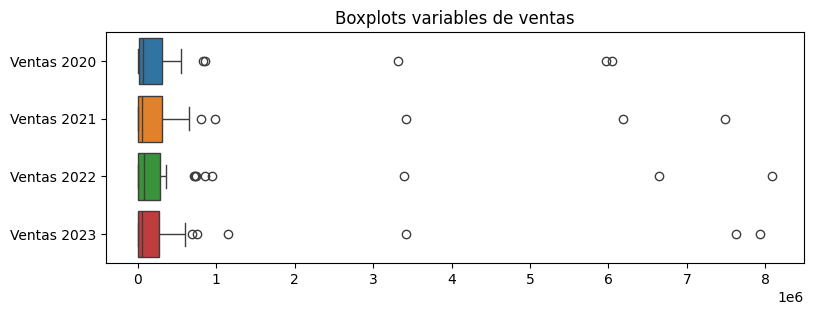

In [8]:
#Boxplots variables de ventas
plt.figure(figsize=[9,3])
sns.boxplot(data[ven], orient='h')
plt.title("Boxplots variables de ventas")
plt.show()

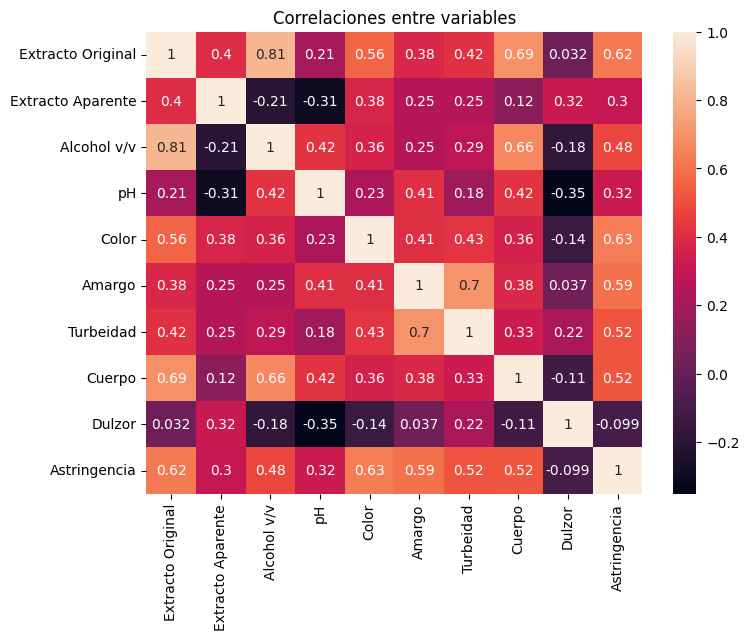

In [9]:
corr = data.drop(columns= ['Ventas 2020', 'Ventas 2021', 'Ventas 2022', 'Ventas 2023','Marca','Seg_Categoria']).corr()
plt.figure(figsize=[8,6])
sns.heatmap(corr, annot=True)
plt.title('Correlaciones entre variables')
plt.show()

Debido a que la medida de Extracto Original tiene varias correlaciones considerables, para evitar incluir información redundante excluimos esta variable.

<Figure size 1000x1000 with 0 Axes>

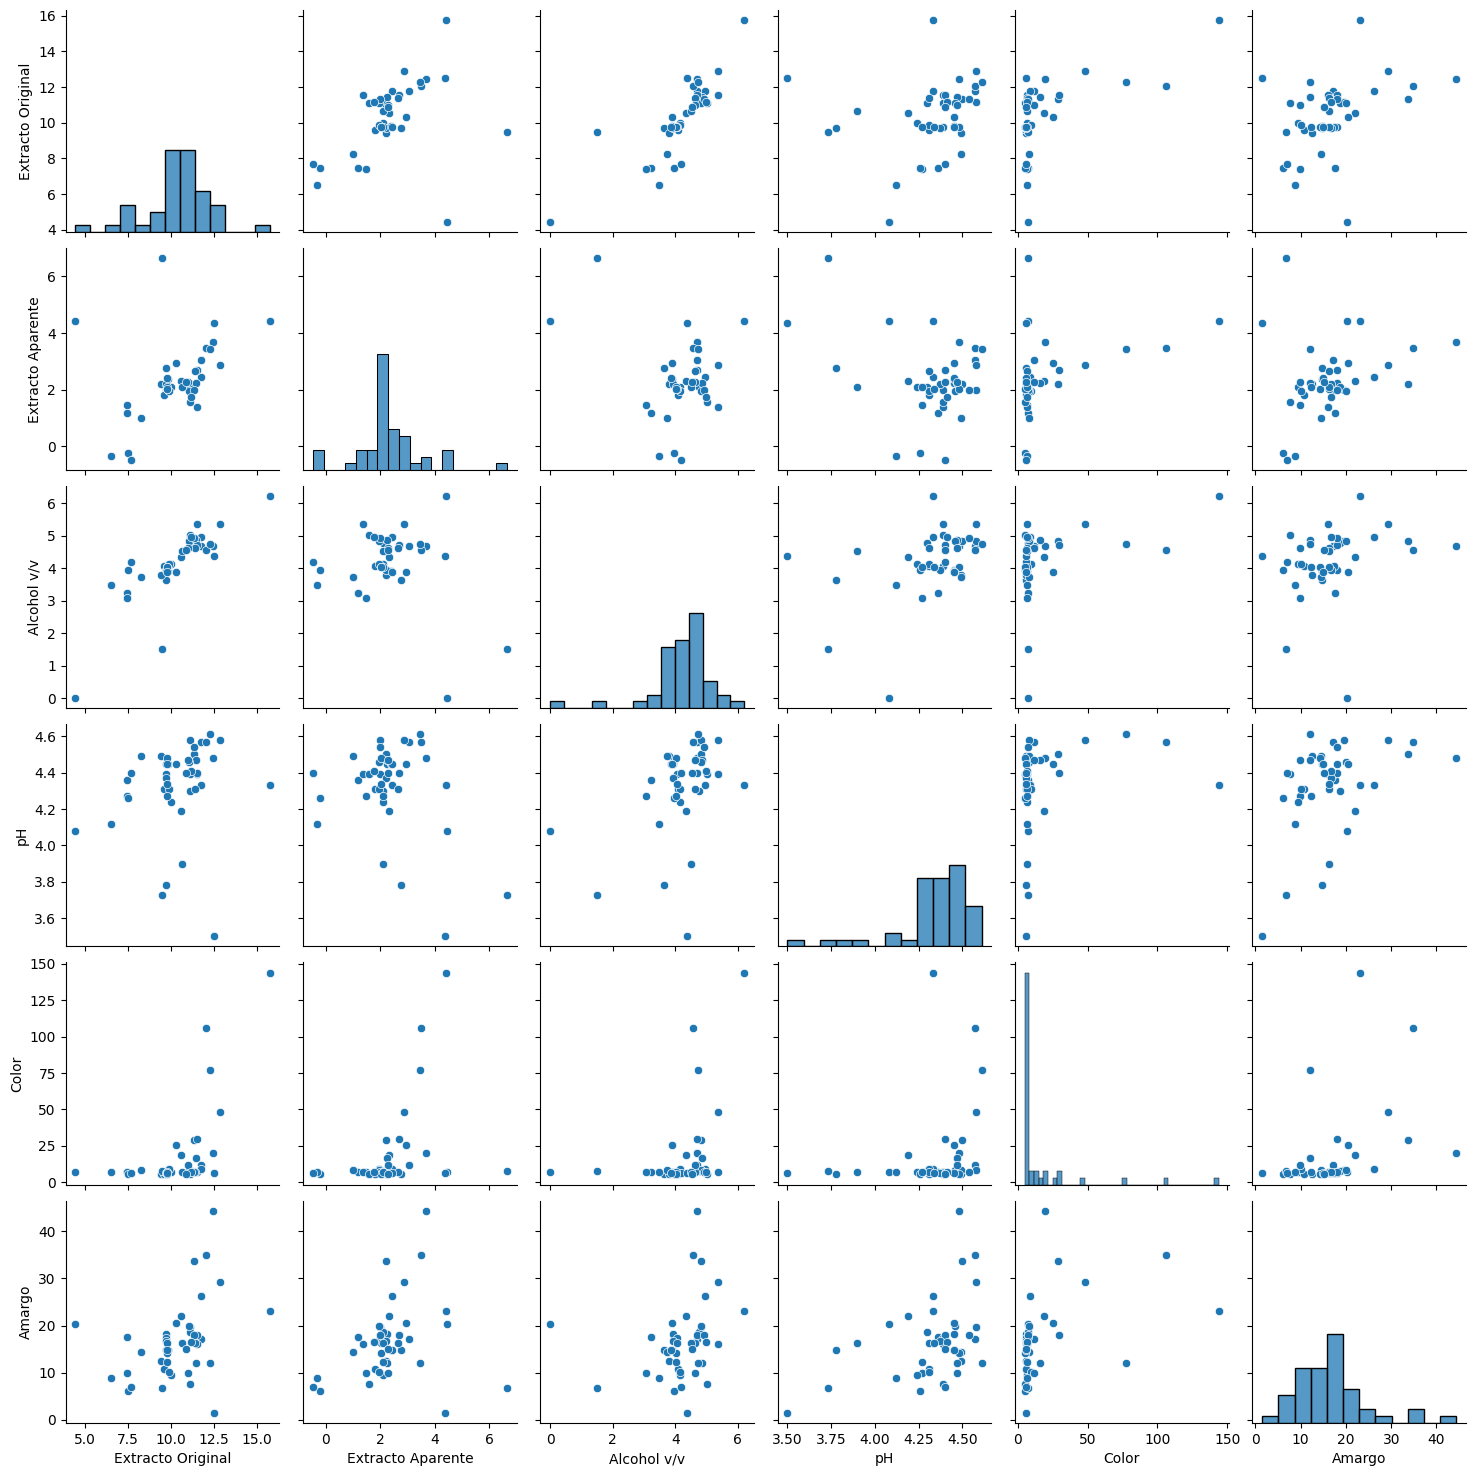

In [10]:
#Diagramas de dispersión entre variables quimicas
plt.figure(figsize=[10,10])
sns.pairplot(data[chem])
plt.show()

### Observaciones análisis preliminar

Se observa lo siguiente:

* Del total de variables, 10 son numéricas y 5 son categóricas.
* De las observaciones solo hay valores faltantes en las ventas del año 2020, quizá explicado por la existencia de marcas nuevas que entraron en el mercado en ese año. Se observan también 2 valores faltantes en el volumen de ventas para el 2021 y el 2023.
* Las estadísticas descriptivas de las variables numéricas permiten observar que las variables tienen diferentes unidades de medida y escalas. Respecto a la variabilidad de los datos, destaca el ‘color’ con una desviación estándar de 30.78 y un coeficiente de variación del 151%.
* Las variables de ventas anuales entre 2020 y 2023 reflejan que existen marcas con diferencias significativas en la cantidad de hectolitros vendidos, lo que se observa claramente en la amplitud de los rangos intercuartílicos.
* Los gráficos permiten ver que el 67 % de las cervezas tiene turbiedad clara/cristalina, el 86 % de las marcas tienen cuerpo ligero medio o moderado, alrededor del 73% de las revisadas tienen un grado de astringencia leve o moderada y el 84 % son leve o moderadamente dulces. Por último, la categoría revela que la mayor parte de las cervezas son Mainstream o premium, mientras las malta y light se encuentran en menor medida.
* Las variables de ventas anuales entre 2020 y 2023 cuentan con las siguientes distribuciones, señalando que existen algunas marcas con ventas muy por encima del promedio.
* Al revisar posibles correlaciones entre las variables encontramos algunas correlaciones leves (entre 0.5 y 0.6) entre las variables turbiedad y amargura, la medición de cuerpo y extracto original y astringencia y extracto original. Esto nos lleva a excluir la variable 'extracto original'.




## 2. Tratamiento y transformación de datos

In [11]:
# Calculo de incrementos de ventas anuales
data['Incremento 2021'] = (data['Ventas 2020'] -data['Ventas 2021']) / data['Ventas 2020']
data['Incremento 2022'] = (data['Ventas 2021'] -data['Ventas 2022']) / data['Ventas 2021']
data['Incremento 2023'] = (data['Ventas 2022'] -data['Ventas 2023']) / data['Ventas 2022']
data = data[~data['Ventas 2023'].isna()]
data['Incremento 2023'] = data['Incremento 2023'].fillna(0)
df = data.copy()
data.drop(columns=['Marca','Seg_Categoria'], inplace=True)
data.drop(columns = ['Extracto Original','Incremento 2021','Incremento 2022','Ventas 2020', 'Ventas 2021', 'Ventas 2022'], inplace=True)
#Limpieza de datos
data_Db = data #Copia de la base de datos
#Se comienza por estandarizar los valores ordinales de las variables sensoriales.
new_vars = []
for var in sens:
    data_Db[f'{var}_Dist'] = data_Db[var].apply(lambda x: (x-0.5)/data_Db[var].max())
    new_vars.append(f'{var}_Dist')
data_Db.drop(columns=sens, inplace=True) #Se eliminan las variables originales
#Se procede luego a estandarizar las demás variables para corregir por diferentes valores de mediciones

for var in data_Db.columns:
    if var not in new_vars:
        scaler = StandardScaler()
        Ventas_SC = scaler.fit_transform(data_Db[[var]]) #Se estandariza la variable
        data_Db[f'{var}_Scale'] = Ventas_SC
        data_Db.drop(columns=var, inplace=True) #Se elimina la variable original
data_Db.head()

,Turbeidad_Dist,Cuerpo_Dist,Dulzor_Dist,Astringencia_Dist,Extracto Aparente_Scale,Alcohol v/v_Scale,pH_Scale,Color_Scale,Amargo_Scale,Ventas 2023_Scale,Incremento 2023_Scale
0,0.500000,0.375,0.375,0.5,0.617245,0.484259,1.026004,-0.183409,0.079009,-0.344828,0.553214
1,0.833333,0.875,0.375,0.9,1.129322,0.484259,0.629505,0.106471,3.557949,-0.343742,-0.061237
2,0.833333,0.375,0.625,0.7,0.006057,0.120719,-0.648106,0.073023,0.716177,-0.344732,0.380520
3,0.833333,0.625,0.375,0.7,0.452059,1.180180,1.070060,1.154497,1.620957,-0.343716,-0.121284
4,0.500000,0.875,0.125,0.9,1.732251,2.063064,-0.031328,4.722246,0.830868,-0.343494,0.033975


Se realizan los siguientes cambios:
* Para adicionar información al modelo, se construyen medidas del incremento en ventas entre cada año que bien pueden emplearse al momento de construir el modelo de clúster o perfilar los resultados obtenidos. No obstante, debido a los valores faltantes de años anteriores y la intención de mantener la información de ventas más reciente, se determina mantener únicamente las ventas asociadas a 2023.
* Se escalan las variables numéricas (parámetros físico-químicos).
* Se estandarizan las variables ordinales (variables de medición sensorial), de manera que se reescalen los valores de cada variable para que estén en un rango proporcional a su valor máximo, centrados alrededor de 0.5.

## 3. Métodos: Clustering

### 3.1. K means

In [12]:
df_kmeans = data[["Extracto Aparente_Scale", "Alcohol v/v_Scale", "pH_Scale", "Color_Scale", "Amargo_Scale", "Turbeidad_Dist", "Cuerpo_Dist", "Dulzor_Dist", "Astringencia_Dist"]]

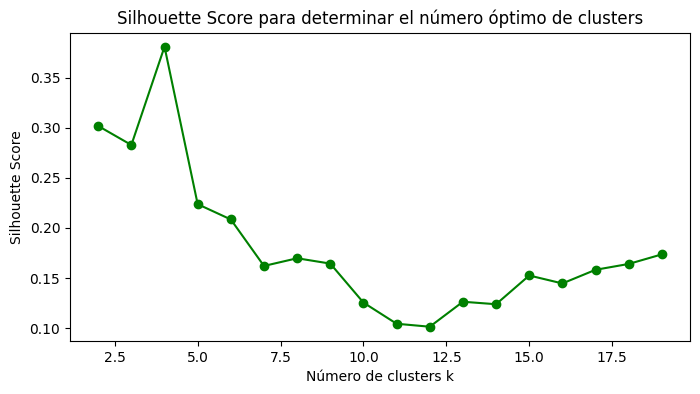

El número óptimo de clusters según el silhouette score es: 4


In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_kmeans)

K = range(2, 20)
silhouette_scores = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 4))
plt.plot(K, silhouette_scores, 'bo-', color = 'g')
plt.xlabel('Número de clusters k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score para determinar el número óptimo de clusters')
plt.show()

k_optimo = K[np.argmax(silhouette_scores)]
print(f"El número óptimo de clusters según el silhouette score es: {k_optimo}")


In [14]:
k_optimo = 4
kmeans = KMeans(n_clusters=k_optimo, random_state=123)
kmeans.fit(X_scaled)

KMeans(n_clusters=4, random_state=123)

In [15]:
df['Cluster'] = kmeans.labels_
df = df.drop(columns=['Ventas 2020', 'Ventas 2021'])

estadisticas_cluster = df.groupby('Cluster').agg({
    'Extracto Aparente': ['mean', 'std'],
    'Alcohol v/v': ['mean', 'std'],
    'pH': ['mean', 'std'],
    'Color': ['mean', 'std'],
    'Amargo': ['mean', 'std','min','max'],
    'Turbeidad': lambda x: x.mode()[0],
    'Cuerpo': lambda x: x.mode()[0],
    'Dulzor': lambda x: x.mode()[0],
    'Astringencia': lambda x: x.mode()[0]
}).reset_index().round(2)

cantidad_marcas = df.groupby('Cluster').size().reset_index(name='Cantidad de marcas')
print(cantidad_marcas)
estadisticas_cluster

   Cluster  Cantidad de marcas
0        0                  29
1        1                  10
2        2                   4
3        3                   2


Cluster Extracto Aparente       Alcohol v/v          pH         Color  \
                       mean   std        mean   std  mean   std    mean   
0       0              1.77  0.84        4.23  0.55  4.37  0.13    7.28   
1       1              2.66  0.59        4.70  0.39  4.45  0.12   30.30   
2       2              4.55  1.59        2.38  2.00  3.77  0.24    6.64   
3       3              3.92  0.69        5.47  1.05  4.47  0.20  110.65   

         Amargo                    Turbeidad   Cuerpo   Dulzor Astringencia  
     std   mean   std    min   max  <lambda> <lambda> <lambda>     <lambda>  
0   2.37  13.61  3.72   6.11  18.6         1        2        2            2  
1  29.29  26.86  8.60  18.00  44.4         3        3        3            3  
2   0.89  10.80  8.35   1.50  20.3         1        1        4            3  
3  47.16  17.50  7.78  12.00  23.0         1        3        1            4

### 3.2. Clustering Jerárquico

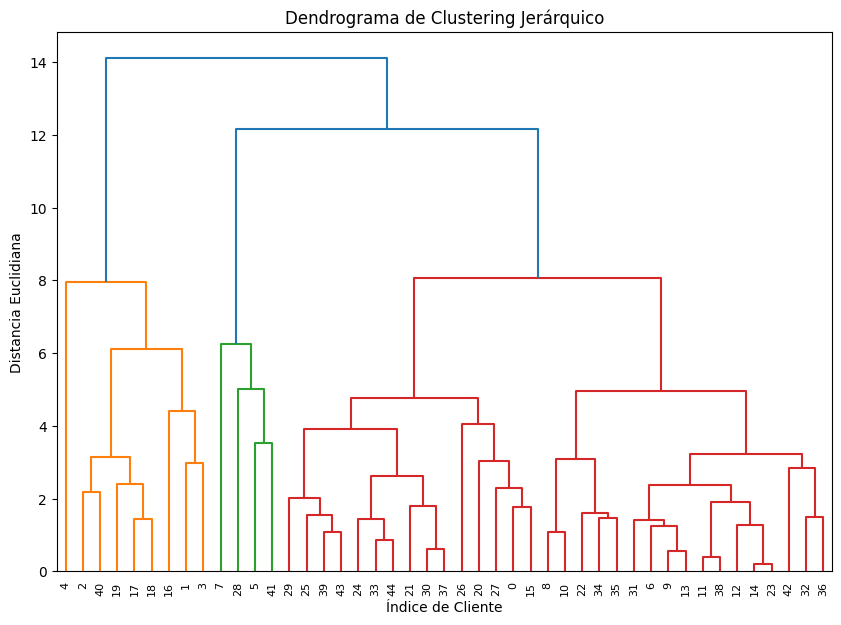

In [16]:
variables = ['Turbeidad_Dist', 'Cuerpo_Dist', 'Dulzor_Dist', 'Astringencia_Dist', 'Extracto Aparente_Scale', 'Alcohol v/v_Scale', 'pH_Scale', 'Color_Scale', 'Amargo_Scale']

# Estandarización de variables
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_Db[variables])

# Dendrograma
linked = linkage(data_scaled, method='ward', metric='euclidean')

# Grafica Dendrograma
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='ascending', show_leaf_counts=True)
plt.title('Dendrograma de Clustering Jerárquico')
plt.xlabel('Índice de Cliente')
plt.ylabel('Distancia Euclidiana')
plt.show()

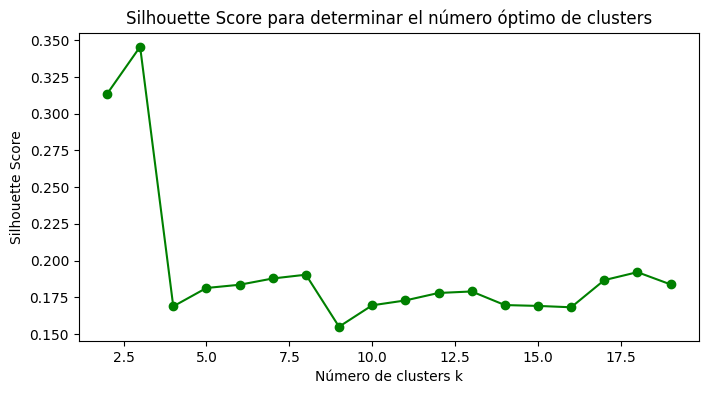

In [17]:
K = range(2, 20)
silhouette_scores = []

for k in K:
    cluster_sk = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='ward')
    labels = cluster_sk.fit_predict(data_scaled)
    score = silhouette_score(data_scaled, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 4))
plt.plot(K, silhouette_scores, 'bo-', color = 'g')
plt.xlabel('Número de clusters k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score para determinar el número óptimo de clusters')
plt.show()

In [18]:
# Distancia en 7
clusters = fcluster(linked, t=10, criterion='distance')

# Número de clusters
num_clusters = len(set(clusters))

print(f"Número de clusters obtenidos con una distancia de corte de 6: {num_clusters}")

Número de clusters obtenidos con una distancia de corte de 6: 3


#### **Algoritmo Jerárquico Aglomerativo**

In [19]:
df_jerarquico = df.copy()

# Aplicar AgglomerativeClustering con el número de clusters encontrado
cluster_sk = AgglomerativeClustering(n_clusters=num_clusters, metric='euclidean', linkage='ward')
cluster_sk.fit(data_scaled)

# Añadir las etiquetas de cluster al DataFrame original
df_jerarquico['Cluster'] = cluster_sk.labels_

# Filtrar solo las columnas numéricas del DataFrame
columnas_numericas = df_jerarquico.select_dtypes(include=['number'])

# Agrupar por los clusters y calcular la media solo en las columnas numéricas
#cluster_description = columnas_numericas.groupby(df_jerarquico['Cluster']).agg(['count','mean', 'std', 'min', 'max'])

#cluster_description

estadisticas_cluster_jer = df_jerarquico.groupby('Cluster').agg({
    'Extracto Aparente': ['mean', 'std'],
    'Alcohol v/v': ['mean', 'std'],
    'pH': ['mean', 'std'],
    'Color': ['mean', 'std'],
    'Amargo': ['mean', 'std','min','max'],
    'Turbeidad': lambda x: x.mode()[0],
    'Cuerpo': lambda x: x.mode()[0],
    'Dulzor': lambda x: x.mode()[0],
    'Astringencia': lambda x: x.mode()[0]
}).reset_index().round(2)

cantidad_marcas_jer = df_jerarquico.groupby('Cluster').size().reset_index(name='Cantidad de marcas')
print(cantidad_marcas_jer)
estadisticas_cluster_jer

   Cluster  Cantidad de marcas
0        0                  32
1        1                   9
2        2                   4


Cluster Extracto Aparente       Alcohol v/v          pH        Color         \
                       mean   std        mean   std  mean   std   mean    std   
0       0              1.86  0.87        4.28  0.54  4.38  0.14  10.21  13.07   
1       1              2.92  0.80        4.85  0.65  4.45  0.14  45.42  47.58   
2       2              4.55  1.59        2.38  2.00  3.77  0.24   6.64   0.89   

  Amargo                    Turbeidad   Cuerpo   Dulzor Astringencia  
    mean   std    min   max  <lambda> <lambda> <lambda>     <lambda>  
0  13.90  3.80   6.11  20.0         1        2        2            2  
1  28.18  8.22  19.60  44.4         3        3        3            3  
2  10.80  8.35   1.50  20.3         1        1        4            3

[0.40376898 0.21032724 0.10628842 0.09455872]


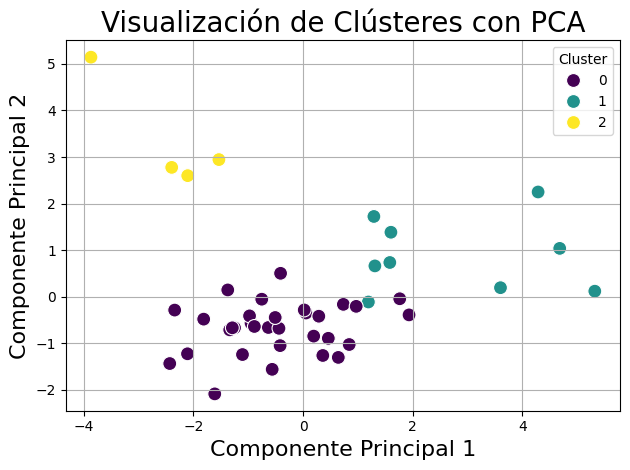

In [20]:
from sklearn.decomposition import PCA
# Suponiendo que 'data_scaled' es el DataFrame que contiene tus datos escalados
pca = PCA(n_components=4)
pca_result = pca.fit_transform(data_scaled)

# Convertir los resultados a un DataFrame
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2','PC3','PC4'])

# Añadir la columna de clústeres
pca_df['Cluster'] = df_jerarquico['Cluster']
print(pca.explained_variance_ratio_)
# Crear el gráfico
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='viridis', s=100)

# Añadir título y etiquetas
plt.title('Visualización de Clústeres con PCA', fontsize=20)
plt.xlabel('Componente Principal 1', fontsize=16)
plt.ylabel('Componente Principal 2', fontsize=16)
plt.legend(title='Cluster')
plt.grid()

plt.tight_layout()
plt.show()

### 3.3. DBSCAN

In [21]:
#Función de evaluación de datasets
def eval_DBSCAN(data=data_Db ,graphs=False, by_silouhette = True):
    neig = []
    silhouettes = []
    db_scores = []
    epsilon = []

    for i in range(2,10):
        neigh = NearestNeighbors(n_neighbors = i)
        nbrs = neigh.fit(data)
        distancias, indices = nbrs.kneighbors(data)
        distancias = np.sort(distancias.flatten())

        #Hayando el punto de codo del modelo para esta cantidad de vecinos
        k = np.arange(len(distancias))
        knee = KneeLocator(k, distancias, S=1, curve='convex', direction='increasing', interp_method='polynomial')
        point = knee.knee
        epsilon.append(distancias[point])

        #Estimadno el modelo
        db = DBSCAN(eps = distancias[point], min_samples = i).fit(data)

        #obteniendo coeficiente de silhoette
        silhouette = silhouette_score(data, db.labels_)
        silhouettes.append(silhouette)

        #obteniendo davies bouldin score
        db_Score = davies_bouldin_score(data, db.labels_)
        db_scores.append(db_Score)

        neig.append(i)

        if graphs == True:
            fig=plt.figure(figsize=(5,4), dpi= 100, facecolor='w', edgecolor='k')
            plt.axhline(y = distancias[point], color = 'r', linestyle = '--')
            plt.title(f'Neighbours: {i}, eps value optimo: {round(distancias[point],4)} y silhoette de {round(silhouette,4)}')
            plt.plot(distancias)
            fig.show()

        #Se compilan los resultados
        df_neigh_eps = pd.DataFrame({'Neighbors': neig,'Epsilon':epsilon, 'Silhouette':silhouettes, 'D-B Score': db_scores})

        if by_silouhette == True:
            df_neigh_eps.sort_values(by='Silhouette', ascending=False, inplace=True)
        else:
            df_neigh_eps.sort_values(by='D-B Score', inplace=True)

    return df_neigh_eps


In [22]:
df_DBSCAN = df.copy()
#Se evalua el modelo y se encuentran los puntos de codo
dataset = data_Db.drop(columns=['Ventas 2023_Scale', 'Incremento 2023_Scale'])

#Se evalua el mejor resultado
res_full_data = eval_DBSCAN(data=dataset, graphs=False, by_silouhette=False)

#Se obtienen los resultados
n = round(res_full_data.iloc[0,:][0])
eps = res_full_data.iloc[0,:][1]
silh = res_full_data.iloc[0,:][2]
db_Score = res_full_data.iloc[0,:][3]
#Numero de vecinos
print(f'Número óptimo de vecinos: {n}')
print(f'Epsilon encontrado: {round(eps,4)}')
print(f'Coef de silhouette {round(silh,4)}')
print(f'Davies–Bouldin index {round(db_Score,4)}')

#Modelo definitivo con los mejores parámetros encontrados
db = DBSCAN(eps = eps, min_samples = n).fit(dataset)

clusteres = db.labels_
n_clusteres = len(set(clusteres)) - (1 if -1 in clusteres else 0)
df_DBSCAN = pd.DataFrame(df_DBSCAN).assign(Cluster = clusteres)

df_DBSCAN['Cluster'].value_counts()

Número óptimo de vecinos: 3
Epsilon encontrado: 1.1295
Coef de silhouette 0.2864
Davies–Bouldin index 1.6357


,count
Cluster,
0,29
-1,13
1,3


In [23]:
res_full_data

,Neighbors,Epsilon,Silhouette,D-B Score
1,3,1.129491,0.286383,1.635724
0,2,1.025195,0.251412,1.653046
6,8,1.766537,0.465737,1.901940
7,9,1.810844,0.465737,1.901940
5,7,1.703484,0.390531,2.536454
4,6,1.465428,0.369814,2.930849
2,4,1.244800,0.356979,2.968971
3,5,1.350973,0.356979,2.968971


In [24]:
estadisticas_cluster_DBSCAN = df_DBSCAN.groupby('Cluster').agg({
    'Extracto Aparente': ['mean', 'std'],
    'Alcohol v/v': ['mean', 'std'],
    'pH': ['mean', 'std'],
    'Color': ['mean', 'std'],
    'Amargo': ['mean', 'std','min','max'],
    'Turbeidad': lambda x: x.mode()[0],
    'Cuerpo': lambda x: x.mode()[0],
    'Dulzor': lambda x: x.mode()[0],
    'Astringencia': lambda x: x.mode()[0]
}).reset_index().round(2)

cantidad_marcas = df_DBSCAN.groupby('Cluster').size().reset_index(name='Cantidad de marcas')
print(cantidad_marcas)
estadisticas_cluster_DBSCAN.T

   Cluster  Cantidad de marcas
0       -1                  13
1        0                  29
2        1                   3


0      1     2
Cluster                     -1.00   0.00  1.00
Extracto Aparente mean       3.47   2.07 -0.35
                  std        1.27   0.47  0.13
Alcohol v/v       mean       4.13   4.30  3.88
                  std        1.64   0.55  0.37
pH                mean       4.20   4.41  4.26
                  std        0.37   0.09  0.14
Color             mean      37.33   8.93  5.92
                  std       44.75   5.75  0.70
Amargo            mean      21.92  14.99  7.30
                  std       11.97   3.52  1.37
                  min        1.50   7.60  6.11
                  max       44.40  20.50  8.80
Turbeidad         <lambda>   1.00   1.00  1.00
Cuerpo            <lambda>   2.00   2.00  2.00
Dulzor            <lambda>   2.00   2.00  2.00
Astringencia      <lambda>   3.00   2.00  2.00

DBSCAN no logra agrupar muchos clusters. Obtiene unicamente un cluster de cervezas lager (alcohol medio / bajo, color claro y amargor medio) y otro cluster de cervezas ligeras (Bajo alcohol, cervezas mas claras y bajo amargor). Para este algorítmo todo lo demás es muy disperso para agruparse dentro de otro cluster, por lo que tipifica en su mayoría cervezas alrtesanales como outlyers.

## 4. Modelo seleccionado: K-means

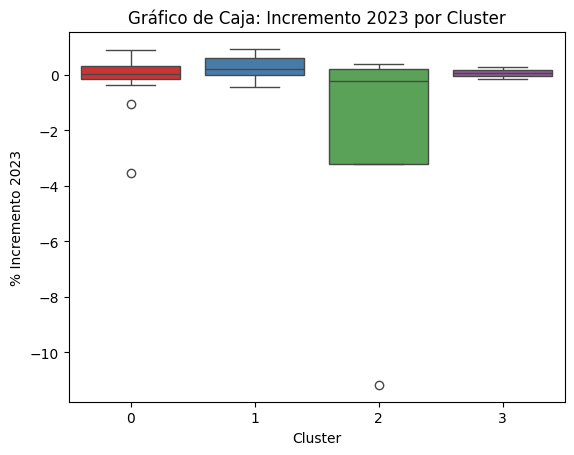

In [25]:
sns.boxplot(data=df, y='Incremento 2023', x = 'Cluster', palette='Set1')
plt.title('Gráfico de Caja: Incremento 2023 por Cluster')
plt.xlabel('Cluster')
plt.ylabel('% Incremento 2023')
plt.show()

In [26]:
# Proporción de participación por cluster por ventas 2023
df_participacion = df.groupby('Cluster')['Ventas 2023'].sum().reset_index()
df_participacion['% Ventas 2023'] = round(df_participacion['Ventas 2023'] / df_participacion['Ventas 2023'].sum() * 100,2)
df_participacion

,Cluster,Ventas 2023,% Ventas 2023
0,0,24873759,97.38
1,1,363853,1.42
2,2,254839,1.00
3,3,49962,0.20


In [27]:
df_participacion = df.groupby('Cluster')['Incremento 2023'].mean().reset_index()
df_participacion['Incremento 2023'] = round(df_participacion['Incremento 2023'] * 100,2)
df_participacion

,Cluster,Incremento 2023
0,0,-2.98
1,1,25.89
2,2,-280.54
3,3,6.52


In [28]:
df['color'] = df['Incremento 2023'].apply(lambda x: 'incremento' if x > 0 else 'decrecimiento')
df['Incremento Absoluto'] = df['Incremento 2023'].abs()
df.head()

,Marca,Seg_Categoria,Extracto Original,Extracto Aparente,Alcohol v/v,pH,Color,Amargo,Turbeidad,Cuerpo,Dulzor,Astringencia,Ventas 2022,Ventas 2023,Incremento 2021,Incremento 2022,Incremento 2023,Cluster,color,Incremento Absoluto
0,MARCA 1,Artesanal,11.77,3.06,4.69,4.57,12.0,17.1,2,2,2,3,539.0,118,NaN,-0.253488,0.781076,0,incremento,0.781076
1,MARCA 2,Artesanal,12.43,3.68,4.69,4.48,19.8,44.4,3,4,2,5,1445.0,1904,NaN,-0.456653,-0.317647,1,decrecimiento,0.317647
2,MARCA 3,Artesanal,10.56,2.32,4.34,4.19,18.9,22.1,3,2,3,4,523.0,276,NaN,-1.170124,0.472275,1,incremento,0.472275
3,MARCA 4,Artesanal,12.88,2.86,5.36,4.58,48.0,29.2,3,3,2,4,1367.0,1948,NaN,-0.469892,-0.425018,1,decrecimiento,0.425018
4,MARCA 5,Artesanal,15.75,4.41,6.21,4.33,144.0,23.0,2,4,1,5,2015.0,2312,NaN,-0.812050,-0.147395,3,decrecimiento,0.147395


In [29]:
variables_analisis = ['Extracto Aparente', 'Alcohol v/v', 'pH', 'Color', 'Amargo',
                      'Turbeidad', 'Cuerpo', 'Dulzor', 'Astringencia']

for variable in variables_analisis:
    fig = px.scatter(
        df,
        x='Cluster',
        y=variable,
        size='Incremento Absoluto',
        color='color',
        hover_name='Marca',
        hover_data={'Incremento Absoluto': True, variable: True},
        title=f'Gráfico de Incremento para {variable}',
        labels={'Cluster': 'Cluster', variable: variable},
        size_max=60
    )

    fig.update_xaxes(
        tick0=0,
        dtick=1
    )

    fig.update_yaxes(
        tick0=round(df[variable].min()),
        dtick=1
    )

    fig.show()

In [30]:
for variable in variables_analisis:
    fig = px.scatter(
        df,
        x='Cluster',
        y=variable,
        size='Ventas 2023',
        hover_name='Marca',
        hover_data={'Ventas 2023': True, variable: True},
        title=f'Gráfico de Ventas para {variable}',
        labels={'Cluster': 'Cluster', variable: variable},
        size_max=60
    )

    fig.update_xaxes(
        tick0=0,
        dtick=1
    )

    fig.update_yaxes(
        tick0=round(df[variable].min()),
        dtick=1
    )

    fig.show()

[0.31729277 0.23023193 0.15892634 0.12875348]


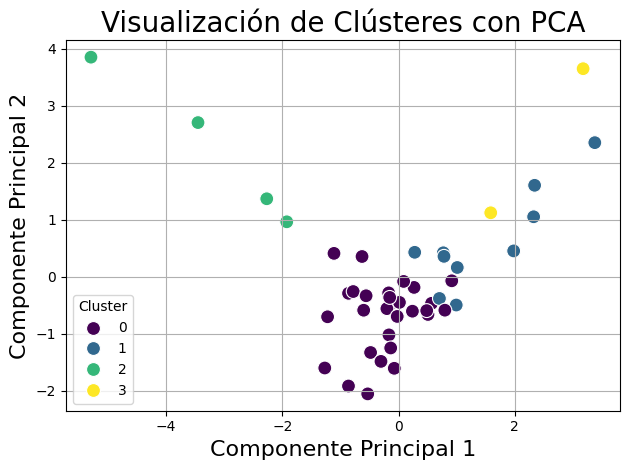

In [31]:
# Suponiendo que 'data_scaled' es el DataFrame que contiene tus datos escalados
pca = PCA(n_components=4)
pca_result = pca.fit_transform(data)

# Convertir los resultados a un DataFrame
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2','PC3','PC4'])

# Añadir la columna de clústeres
pca_df['Cluster'] = df['Cluster']
print(pca.explained_variance_ratio_)
# Crear el gráfico
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='viridis', s=100)

# Añadir título y etiquetas
plt.title('Visualización de Clústeres con PCA', fontsize=20)
plt.xlabel('Componente Principal 1', fontsize=16)
plt.ylabel('Componente Principal 2', fontsize=16)
plt.legend(title='Cluster')
plt.grid()

plt.tight_layout()
plt.show()

## 5. Conclusiones

El análisis de clustering permitió segmentar el mercado de cervezas en Colombia en función de sus características fisicoquímicas, sensoriales y de ventas. A través de diferentes enfoques tales como K-Means, clustering jerárquico y DBSCAN, se identificaron varios grupos que reflejan las diferentes tipologías de cervezas en el mercado. Estos resultados muestran oportunidades de negocio, destacando perfiles de cerveza artesanal, premium y negra.

De acuerdo con los resultados obtenidos y la métrica de silhouette score, el mejor algoritmo para analizar el mercado es K-Means. Este agrupa las cervezas en 4 clústeres que representan perfiles distintos de cerveza: cerveza de consumo rubia masivo, cerveza artesanal o premium, cerveza light con dulzor alto y cervezas negras astringentes. En conjunto con los valores de incremento de ventas y participación en el mercado de las diferentes marcas, se llega las siguientes conclusiones:

*   Oportunidad de negocio en el mercado de la cerveza artesanal o premium, con el desarrollo de una nueva marca.
*   Para invertir en cervezas de consumo masivo es necesario de un capital bastante alto dado que es un segmento muy competitivo y estancado.
*   Existe una oportunidad de negocio en las cervezas negras a largo plazo, dado su crecimiento lento y baja participación en el mercado.

## 6. Bibliografía

[1] Mawatari, M., Nagashima, Y., Aoki, T., Hirota, T., & Yamada, M. (1991). Sensory Characterization of Beer Flavor Using Cluster Analysis. Journal of the American Society of Brewing Chemists, 49(2), 59–64. https://doi-org.ezproxy.uniandes.edu.co/10.1094/ASBCJ-49-0059

[2] El Tiempo. (2024). Competir en un mercado que históricamente ha sido un monopolio no ha sido una tarea fácil: Central Cervecera. https://www.eltiempo.com/economia/empresas/competir-en-un-mercadoque-historicamente-ha-sido-un-monopolio-no-ha-sido-una-tarea-facil-central-cervecera-3370142

[3] La República. (2024). La industria cervecera artesanal tiene alrededor de 0,5% del mercado total de licores. https://www.larepublica.co/consumo/la-industria-cervecera-artesanal-tiene-alrededor-de-0-5-delmercado-total-de-licores-3444506

[4] Castellanos, J. y Sossa, C. (2022). Industria cervecera colombiana: un análisis desde su comercio internacional. Expresiones, Revista Estudiantil de Investigación, 9(17), 51-59.

[5] Mariño, Cynthia, (2023). Análisis de clustering para la segmentación de mercado: un caso de estudio de una aplicación de una bebida alcohólica en las principales ciudades de Colombia. Universidad del Bosque.